In [10]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Importing the dataset
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')

In [12]:
X_train.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare_norm
0,0,0,1,0,1,0,0,1,-0.563674,0.431350,-0.474326,-0.877591
1,1,0,0,1,0,1,0,0,0.669217,0.431350,-0.474326,1.366380
2,0,0,1,1,0,0,0,1,-0.255451,-0.475199,-0.474326,-0.796281
3,1,0,0,1,0,0,0,1,0.438050,0.431350,-0.474326,1.066796
4,0,0,1,0,1,0,0,1,0.438050,-0.475199,-0.474326,-0.781901


### Cross-validation: baseline performance
First, a k-folds cross-validation will be employed, to establish a baseline using multiple classification models. The baseline scores are as follows:
##### Summary:
- **Naïve Bayes:** 77.06%
- **Logistic Regression:** 78.97%
- **K-NN:** 81.55%
- **Decision Tree:** 77.84%
- **Random Forest:** 80.99%
- **SVC:** 82.23%
- **XGBoost:** 81.44%

In [47]:
# Importing the libraries
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

base_mean = []
base_std = []

In [48]:
# Naive Bayes
nb = GaussianNB()
cv = cross_val_score(nb, X_train, np.ravel(y_train), cv=5)
base_mean.append(cv.mean())
base_std.append(cv.std())
print(cv)
print()
print('mean: ', cv.mean())
print('std: ', cv.std())

[0.70786517 0.76404494 0.78089888 0.79213483 0.8079096 ]

mean:  0.7705706849488987
std:  0.03446866969790026


In [49]:
# Logistic Regression
log_reg = LogisticRegression()
cv = cross_val_score(log_reg, X_train, np.ravel(y_train), cv=5)
base_mean.append(cv.mean())
base_std.append(cv.std())
print(cv)
print()
print('mean: ', cv.mean())
print('std: ', cv.std())

[0.78651685 0.79775281 0.76966292 0.76966292 0.82485876]

mean:  0.7896908525360249
std:  0.02056252403309599


In [50]:
# K-NN
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, np.ravel(y_train), cv=5)
base_mean.append(cv.mean())
base_std.append(cv.std())
print(cv)
print()
print('mean: ', cv.mean())
print('std: ', cv.std())

[0.79213483 0.78651685 0.84269663 0.82022472 0.83615819]

mean:  0.8155462451596522
std:  0.02269221750013065


In [51]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dtree, X_train, np.ravel(y_train), cv=5)
base_mean.append(cv.mean())
base_std.append(cv.std())
print(cv)
print()
print('mean: ', cv.mean())
print('std: ', cv.std())

[0.74719101 0.78651685 0.81460674 0.73033708 0.81355932]

mean:  0.7784422014854313
std:  0.034342468933856285


In [52]:
# Random Forest
forest = RandomForestClassifier(random_state=1)
cv = cross_val_score(forest, X_train, np.ravel(y_train), cv=5)
base_mean.append(cv.mean())
base_std.append(cv.std())
print(cv)
print()
print('mean: ', cv.mean())
print('std: ', cv.std())

[0.78089888 0.80898876 0.85393258 0.78089888 0.82485876]

mean:  0.8099155716371484
std:  0.027732985300898443


In [53]:
# SVC
svc = SVC()
cv = cross_val_score(svc, X_train, np.ravel(y_train), cv=5)
base_mean.append(cv.mean())
base_std.append(cv.std())
print(cv)
print()
print('mean: ', cv.mean())
print('std: ', cv.std())

[0.8258427  0.81460674 0.80898876 0.80337079 0.85875706]

mean:  0.8223132101821875
std:  0.019679215219160818


In [54]:
# XGBoost
xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='error')
cv = cross_val_score(xgb, X_train, np.ravel(y_train), cv=5)
base_mean.append(cv.mean())
base_std.append(cv.std())
print(cv)
print()
print('mean: ', cv.mean())
print('std: ', cv.std())

[0.78089888 0.8258427  0.85393258 0.76966292 0.84180791]

mean:  0.8144289976512411
std:  0.033372687390155684


In [60]:
base_mean

[0.7705706849488987,
 0.7896908525360249,
 0.8155462451596522,
 0.7784422014854313,
 0.8099155716371484,
 0.8223132101821875,
 0.8144289976512411]

### Tuning model performance
Having the baselines established, now I want to see if I can improve model results. This is performed using GridSearch and RandomizedSearch. The results are in the following table:

|Model|Baseline score|Tuned model score|
|:-|-:|-:|
|Naïve Bayes| 77.06%| NA|
|Logistic Regression| 78.97%| 79.87%|
|K-NN| 81.55%| 81.55%|
|Decision Tree| 77.84%| NA|
|Random Forest| 80.99%| 83.36%|
|SVC| 82.23%| 82.34%|
|XGBoost| 81.44%| 84.81%|

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [62]:
def tuned_model(classifier, model):
    print(model)
    print('Tuned score: ' + str(classifier.best_score_))
    print('Tuned parameters: ' + str(classifier.best_params_))

In [86]:
# Logistic Regression
log_reg = LogisticRegression()
param_grid = {
    'max_iter': [2000],
    'penalty': ['l1','l2'],
    'C': np.logspace(-4,4,25),
    'solver': ['liblinear']
    }

GS_log = GridSearchCV(log_reg, param_grid, cv=5, verbose=True, n_jobs=-1)
best_GS_log = GS_log.fit(X_train, np.ravel(y_train))
tuned_model(best_GS_log, 'Logistic Regression')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Logistic Regression
Tuned score: 0.7986859645781755
Tuned parameters: {'C': 0.046415888336127774, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished


In [87]:
# K-NN
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.linspace(2,10,9).astype(int),
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree'],
    'p': [1, 2]
    }

GS_knn = GridSearchCV(knn, param_grid, cv=5, verbose=True, n_jobs=-1)
best_GS_knn = GS_knn.fit(X_train, np.ravel(y_train))
tuned_model(best_GS_knn, 'K-Nearest Neighbors')

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


K-Nearest Neighbors
Tuned score: 0.8155462451596522
Tuned parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    1.2s finished


In [89]:
# Random Forest - Randomized Search
forest = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [100, 500, 1000],
    'bootstrap': [True, False],
    'max_depth': [5, 10, 20, 50, 75, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10]
    }

RS_forest = RandomizedSearchCV(forest, param_distributions=param_grid, n_iter=100, cv=5, verbose=True, n_jobs=-1)
best_RS_forest = RS_forest.fit(X_train, np.ravel(y_train))
tuned_model(best_RS_forest, 'Random Forest - randomized search')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min


Random Forest - randomized search
Tuned score: 0.8313083222243381
Tuned parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


In [90]:
# Random Forest - Grid Search
forest = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [80, 100, 120],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10, 12],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [4, 5, 6]
    }

GS_forest = GridSearchCV(forest, param_grid, cv=5, verbose=True, n_jobs=-1)
best_GS_forest = GS_forest.fit(X_train, np.ravel(y_train))
tuned_model(best_GS_forest, 'Random Forest- grid search')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.1min


Random Forest- grid search
Tuned score: 0.8335555132355742
Tuned parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  2.1min finished


In [92]:
# SVC
svc = SVC(probability=True)
param_grid = [
    {'kernel': ['rbf'], 'gamma': [.001, .01, .1, 1, 2, 10], 'C': [.1, 1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'C': [.1, 1, 10, 100, 1000]},
    ]

GS_svc = GridSearchCV(svc, param_grid, cv=5, verbose=True, n_jobs=-1)
best_GS_svc = GS_svc.fit(X_train, np.ravel(y_train))
tuned_model(best_GS_svc, 'SVC')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s


SVC
Tuned score: 0.8234431536850124
Tuned parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   35.6s finished


In [96]:
# XGBoost - Randomized Search
xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='error')
param_grid = {
    'n_estimators': [20, 50, 100, 250, 500, 1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    'gamma': [0, 0.01, 0.1, 1, 10, 100],
    'min_child_weight': [0, 0.01, 0.1, 1, 10, 100],
    'sampling_method': ['uniform', 'gradient_based']
    }

RS_xgb = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=1000, cv=5, verbose=True, n_jobs=-1)
best_RS_xgb = RS_xgb.fit(X_train, np.ravel(y_train))
tuned_model(best_RS_xgb, 'XGBoost - randomized search')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 617 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1807 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2600 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3476 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4544 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:  5.3min remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  5.4min finished


XGBoost - randomized search
Tuned score: 0.8481432108169873
Tuned parameters: {'subsample': 0.6, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 0, 'max_depth': 15, 'learning_rate': 0.5, 'gamma': 0.1, 'colsample_bytree': 0.2}


In [98]:
# XGBoost - Grid Search
xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='error')
param_grid = {
    'n_estimators': [450, 500, 550],
    'colsample_bytree': [0.2],
    'max_depth': [14, 15],
    'reg_alpha': [0.5],
    'reg_lambda': [2, 5],
    'subsample': [0.55, 0.6, 0.65],
    'learning_rate': [0.5],
    'gamma': [0.1],
    'min_child_weight': [0],
    'sampling_method': ['uniform']
    }

GS_xgb = GridSearchCV(xgb, param_grid, cv=5, verbose=True, n_jobs=-1)
best_GS_xgb = GS_xgb.fit(X_train, np.ravel(y_train))
tuned_model(best_GS_xgb, 'XGBoost - grid search')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   28.2s finished


XGBoost - grid search
Tuned score: 0.8481432108169873
Tuned parameters: {'colsample_bytree': 0.2, 'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 14, 'min_child_weight': 0, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.6}


### Exporting the predicted values
The best results are from the Random Forest and XGBoost. Both models will be used for predicting the test values and uploaded into Kaggle. The following table shows the score results (percentage of correctly predicted results).

|Model|Score|
|:-|-:|
|Random Forest| 80.62%|
|XGBoost| 73.92%|

The fact that XGBoost yielded significantly worse results may be due to the fact that the relevant features used in the model show inconsistencies, as shown in the graphs below.

In [103]:
best_forest = best_GS_forest.best_estimator_.fit(X_train, np.ravel(y_train))
y_pred_forest = best_forest.predict(X_test).astype(int)

best_xgb = best_GS_xgb.best_estimator_.fit(X_train, np.ravel(y_train))
y_pred_xgb = best_xgb.predict(X_test).astype(int)

In [107]:
test = pd.read_csv('test_original.csv')

forest_submission = pd.DataFrame(data = {'PassengerId': test.PassengerId, 'Survived': y_pred_forest})
xgb_submission = pd.DataFrame(data = {'PassengerId': test.PassengerId, 'Survived': y_pred_xgb})

In [108]:
forest_submission.to_csv('ForestSubmission.csv', index=False)
xgb_submission.to_csv('XGBSubmission.csv', index=False)

Text(0.5, 1.0, 'XGB')

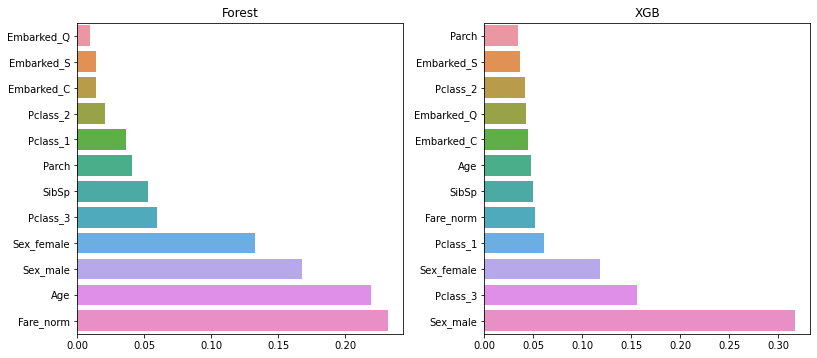

In [139]:
feat_forest = pd.Series(best_forest.feature_importances_, index=X_train.columns)
feat_forest.sort_values(inplace=True)

feat_xgb = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
feat_xgb.sort_values(inplace=True)

f, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
f.tight_layout(pad=5)

sns.barplot(ax=ax[0], y=feat_forest.index, x=feat_forest.values)
ax[0].set_title('Forest')

sns.barplot(ax=ax[1], y=feat_xgb.index, x=feat_xgb.values)
ax[1].set_title('XGB')